In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,HistGradientBoostingRegressor,VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import TransformerMixin

# Analysis

In [422]:
data=pd.read_csv('train.csv')
data

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [423]:
data['volume'] = data['x'] * data['y'] * data['z']

# Calculate density
data['density'] = data['carat'] / data['volume']

# Calculate surface area
data['surface_area'] = 2 * (data['x'] * data['y'] + data['x'] * data['z'] + data['y'] * data['z'])

# Calculate aspect ratio
data['aspect_ratio'] = data['x'] / data['y']

# Calculate total depth percentage
data['total_depth_percentage'] = data['depth'] / data['z']

# Calculate table percentage
data['table_percentage'] = data['table'] / data[['x', 'y']].mean(axis=1)

# Calculate symmetry
data['symmetry'] = data['x'] / data['y'] - data['y'] / data['z']


In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      43152 non-null  int64  
 1   carat                   43152 non-null  float64
 2   cut                     43152 non-null  object 
 3   color                   43152 non-null  object 
 4   clarity                 43152 non-null  object 
 5   depth                   43152 non-null  float64
 6   table                   43152 non-null  float64
 7   price                   43152 non-null  int64  
 8   x                       43152 non-null  float64
 9   y                       43152 non-null  float64
 10  z                       43152 non-null  float64
 11  volume                  43152 non-null  float64
 12  density                 43152 non-null  float64
 13  surface_area            43152 non-null  float64
 14  aspect_ratio            43148 non-null

In [425]:
data.describe()

,Id,carat,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,4.315200e+04,43152.000000,43148.000000,4.315200e+04,4.315200e+04,4.314800e+04
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568,129.852555,inf,152.455740,0.999456,inf,inf,-inf
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238,78.621399,NaN,60.361687,0.013003,NaN,NaN,NaN
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,5.207522e-04,0.000000,0.000000,1.943396e+00,1.701747e+00,-inf
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000,65.135658,6.048225e-03,99.776550,0.992620,1.529968e+01,8.775982e+00,-6.436714e-01
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.832253,6.117163e-03,145.648200,0.995772,1.753541e+01,1.016652e+01,-6.214603e-01
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000,170.844390,6.190022e-03,189.871200,1.006969,2.120275e+01,1.211477e+01,-5.978630e-01
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,inf,2032.880800,1.615572,inf,inf,8.322251e-01


In [426]:
data.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
price                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              4
total_depth_percentage    0
table_percentage          0
symmetry                  4
dtype: int64

In [427]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (e.g., replace NaN with mean)
data.fillna(data.median(), inplace=True)

C:\Users\W10\AppData\Local\Temp\ipykernel_19040\3675782447.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [428]:
data.duplicated().sum()

0

In [10]:
data=data.drop(['Id'],axis=1)

In [429]:
data.corr()

,Id,carat,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981,0.002562,0.000904,0.001221,-0.007372,0.002177,0.001748,-0.008246
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923,0.971061,0.196945,0.980440,0.109803,-0.922296,-0.907507,0.042730
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834,0.004642,0.283759,0.000022,0.042425,0.025814,-0.035132,0.567429
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746,0.167715,0.229720,0.178032,0.118560,-0.193401,0.007025,-0.131796
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665,0.897903,0.136856,0.898735,0.067287,-0.817942,-0.811473,0.009730
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677,0.951559,0.178352,0.981251,0.134961,-0.976468,-0.959532,0.017680
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670,0.974787,0.117157,0.987231,-0.021970,-0.950641,-0.937432,-0.139422
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000,0.944252,0.149975,0.969041,0.103787,-0.955481,-0.937009,0.102233
volume,0.002562,0.971061,0.004642,0.167715,0.897903,0.951559,0.974787,0.944252,1.000000,0.110882,0.991783,0.019795,-0.903386,-0.889361,-0.075820
density,0.000904,0.196945,0.283759,0.229720,0.136856,0.178352,0.117157,0.149975,0.110882,1.000000,0.133857,0.265950,-0.125705,-0.132711,0.023832


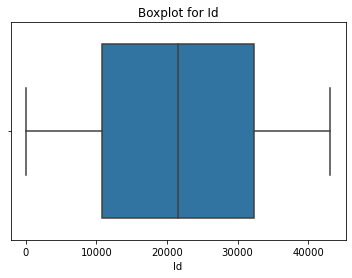

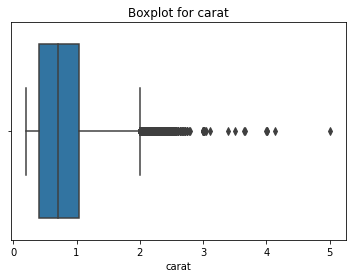

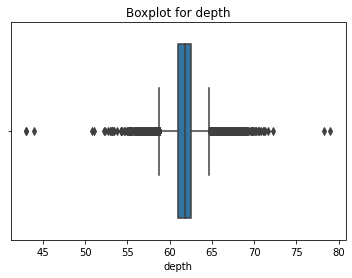

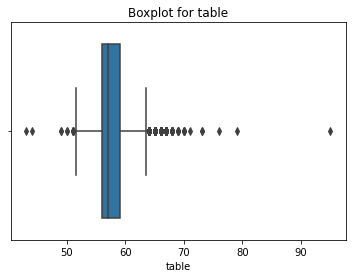

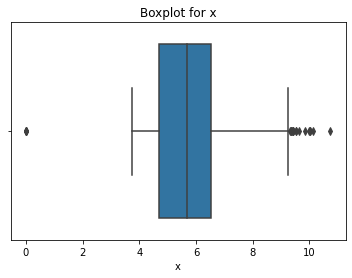

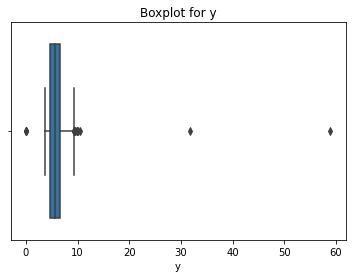

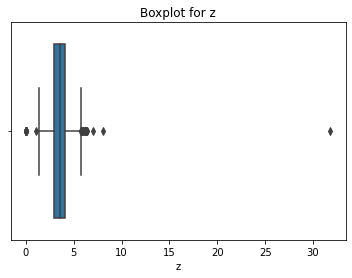

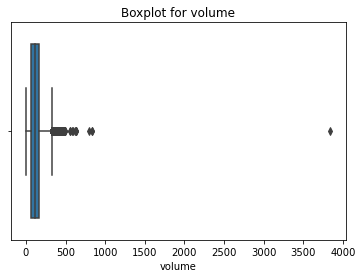

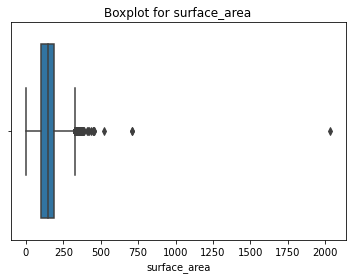

In [113]:
# this one for showing boxplots

numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if col not in 'price':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Feature Engineering

In [13]:
'''def impute_outliers_with_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
num_features = data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    if feature not in 'price':
        data[feature] = impute_outliers_with_bounds(data[feature])'''

"def impute_outliers_with_bounds(series):\n    Q1 = series.quantile(0.25)\n    Q3 = series.quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)\nnum_features = data.select_dtypes(include=[np.number]).columns\nfor feature in num_features:\n    if feature not in 'price':\n        data[feature] = impute_outliers_with_bounds(data[feature])"

In [14]:
'''numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()'''

"numeric_cols = data.select_dtypes(include=['number']).columns\nfor col in numeric_cols:\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(x=data[col])\n    plt.title(f'Boxplot for {col}')\n    plt.show()"

In [501]:
label_encoder = LabelEncoder()

In [502]:
data['color'] = label_encoder.fit_transform(data['color'])
data['cut'] = label_encoder.fit_transform(data['cut'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])

In [336]:
data

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,193.9278,0.995455,15.184275,8.656036,-0.626167
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,243.0152,0.994609,13.503326,7.837838,-0.650624
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,86.9854,1.004535,22.619926,12.669683,-0.622771
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,120.5994,0.994253,19.184953,10.758886,-0.642111
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,146.2544,1.006993,17.428571,9.930314,-0.627293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,2,1,5,61.5,56.0,1760,5.16,5.18,3.18,84.997584,0.006118,119.2200,0.996139,19.339623,10.831721,-0.632792
43148,43149,0.72,4,0,5,62.1,59.0,3016,5.70,5.73,3.55,115.946550,0.006210,146.4750,0.994764,17.492958,10.323710,-0.619320
43149,43150,0.44,3,5,6,61.5,58.0,990,4.95,4.87,3.02,72.801630,0.006044,107.5258,1.016427,20.364238,11.812627,-0.596156
43150,43151,0.31,3,1,4,60.2,58.0,734,4.38,4.43,2.65,51.419010,0.006029,85.4998,0.988713,22.716981,13.166856,-0.682985


In [503]:
ss=StandardScaler()
mm=MinMaxScaler()
rs=RobustScaler()
qt=QuantileTransformer()

In [250]:
data['symmetry']=round(data['symmetry'],2)

KeyError: 'symmetry'

In [504]:
data['carat'] =qt.fit_transform(data[['carat']])
data['depth'] =qt.fit_transform(data[['depth']])
data['table'] =qt.fit_transform(data[['table']])
data['x'] =qt.fit_transform(data[['x']])
data['y'] =qt.fit_transform(data[['y']])
data['z'] =qt.fit_transform(data[['z']])
data['volume'] =qt.fit_transform(data[['volume']])
data['density'] =qt.fit_transform(data[['density']])
data['surface_area'] =qt.fit_transform(data[['surface_area']])
data['aspect_ratio'] =qt.fit_transform(data[['aspect_ratio']])
data['total_depth_percentage'] =qt.fit_transform(data[['total_depth_percentage']])
data['table_percentage'] =qt.fit_transform(data[['table_percentage']])
data['symmetry'] =qt.fit_transform(data[['symmetry']])

In [505]:
data

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,1,0.761762,2,5,3,0.482983,0.460460,4270,0.761261,0.772773,0.773774,0.773415,0.136403,0.772773,0.475031,0.231558,0.223085,0.439808
1,2,0.906907,3,3,7,0.219720,0.629630,15164,0.914915,0.922422,0.897397,0.915136,0.489568,0.916410,0.413557,0.079723,0.084580,0.195745
2,3,0.136136,2,2,5,0.316817,0.276777,828,0.153654,0.134635,0.122122,0.141160,0.237984,0.142142,0.615616,0.854037,0.839840,0.482370
3,4,0.393894,2,3,5,0.288789,0.276777,1577,0.384885,0.392893,0.373874,0.387738,0.560210,0.388388,0.396396,0.607410,0.588589,0.262709
4,5,0.485485,3,4,7,0.240741,0.460460,2596,0.530030,0.504505,0.485986,0.505299,0.324174,0.508113,0.752252,0.482482,0.466873,0.424155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.379379,2,1,5,0.377878,0.276777,1760,0.372372,0.377878,0.365866,0.375385,0.503215,0.374900,0.517518,0.624877,0.599600,0.358032
43148,43149,0.535035,4,0,5,0.603103,0.769269,3016,0.502002,0.509510,0.521021,0.513039,0.797515,0.510908,0.422422,0.493493,0.522123,0.526609
43149,43150,0.317317,3,5,6,0.377878,0.629630,990,0.322322,0.311812,0.317317,0.319041,0.237217,0.318861,0.978406,0.681555,0.712333,0.763242
43150,43151,0.098098,3,1,4,0.120120,0.629630,734,0.118619,0.148649,0.048048,0.107164,0.192539,0.111485,0.068536,0.868340,0.914177,0.063610


In [21]:
x=data.drop(['price'],axis=1)
y=data.price

# Building Models

In [22]:
# never run this

regressors = [
    LinearRegression(),
    GammaRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor(),
    AdaBoostRegressor(),
    PassiveAggressiveRegressor(),
    KNeighborsRegressor(),
    HistGradientBoostingRegressor(),
    LGBMRegressor(),
    ExtraTreeRegressor(),
    XGBRegressor()
]
n=5
acclist=[]
acclist1=[]
accs=dict()
accs1=dict()
for regressor in regressors:
    acclist=[]
    acclist1=[]
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        acc = r2_score(y_test, y_pred)
        acc1 = np.sqrt(mean_squared_error(y_test, y_pred))
        acclist.append(acc)
        acclist1.append(acc1)
    accs[regressor]=[np.mean(acclist),np.std(acclist)]
    accs1[regressor]=[np.mean(acclist1),np.std(acclist1)]
display(accs)
display(accs1)

C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 34518, number of used features: 13
[LightGBM] [Info] Start training from score 3935.592734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 34518, number of used features: 13
[LightGBM] [Info] Start training from score 3932.457211
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the tra

{LinearRegression(): [0.7245139160373613, 0.002275141898168109],
 GammaRegressor(): [0.39242531053324614, 0.007577460333722839],
 SVR(): [0.16891702227432506, 0.008344775291540393],
 DecisionTreeRegressor(): [0.964173633645594, 0.0019367712051872217],
 RandomForestRegressor(): [0.9815679226487216, 0.0009318016690780432],
 MLPRegressor(): [0.7598568495465536, 0.03910663827689101],
 AdaBoostRegressor(): [0.8865985110697956, 0.005303611988884473],
 PassiveAggressiveRegressor(): [0.6452622615678798, 0.009597352340553698],
 KNeighborsRegressor(): [0.9086784102185158, 0.003856604989844193],
 HistGradientBoostingRegressor(): [0.9817083002186389, 0.0007674388163625641],
 LGBMRegressor(): [0.9814124755178666, 0.0006607936415550459],
 ExtraTreeRegressor(): [0.9587493003094879, 0.002047285421774092],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,

{LinearRegression(): [2109.3213449300224, 25.16473104382102],
 GammaRegressor(): [3115.96642190468, 50.67546809537252],
 SVR(): [3648.206230711995, 53.01319841779426],
 DecisionTreeRegressor(): [749.9139701590295, 18.05055254633971],
 RandomForestRegressor(): [540.8699078314022, 14.847269918622299],
 MLPRegressor(): [1947.0518133476476, 167.4206650054957],
 AdaBoostRegressor(): [1343.5502625488855, 35.848485459327485],
 PassiveAggressiveRegressor(): [2381.153241317889, 43.2270439957962],
 KNeighborsRegressor(): [1210.2165761370932, 21.235600662079914],
 HistGradientBoostingRegressor(): [533.596784017983, 14.090643307570371],
 LGBMRegressor(): [546.150216190382, 12.454780519841597],
 ExtraTreeRegressor(): [815.1862457325749, 14.745531764453395],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_

In [ ]:
cvs1=cross_val_score(dtr,X_train,y_train, cv=10)
display(cvs1)
(cvs1.mean(),cvs1.std())

In [413]:
x=data.drop(['price'],axis=1)
y=data.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
display(r2_score(y_pred,y_test))
display(np.sqrt(mean_squared_error(y_pred,y_test)))

0.980457002041347

542.7437499039451

In [516]:
x=data.drop(['price','z','x','y'],axis=1)
y=data.price
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2)
lgpm=LGBMRegressor()
lgpm.fit(X_train1,y_train1)
y_pred4 = lgpm.predict(X_test1)
display(r2_score(y_pred4,y_test1))
display(np.sqrt(mean_squared_error(y_pred4,y_test1)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 14
[LightGBM] [Info] Start training from score 3942.860259


0.9817495265705877

529.3084320619793

In [517]:
model1 = RandomForestRegressor(n_estimators=100)
model2 = HistGradientBoostingRegressor()
model3 = LGBMRegressor()
model4 =  XGBRegressor()
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4)])

# Step 4: Train the ensemble model
voting_regressor.fit(X_train1, y_train1)

# Step 5: Evaluate the model performance
y_pred = voting_regressor.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
display(r2_score(y_pred,y_test1))
print("Mean Squared Error:", np.sqrt(mse))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 14
[LightGBM] [Info] Start training from score 3942.860259


0.9826913695751184

Mean Squared Error: 515.2347123386845


In [ ]:
# NEVER EVER RUN THIS UNLESS YOU ARE 100 PERCENT SURE

param_grid = {
    'n_estimators': np.arange(600, 700, 20),
    'learning_rate': np.arange(0.04, 0.045, 0.001),
    'max_depth': np.arange(5, 8, 1),
    #'num_leaves': np.arange(20, 41, 5), 
    #'min_child_samples': np.arange(10, 31, 5), 
    #'reg_alpha': [0, 0.1, 0.5, 1.0], 
    #'reg_lambda': [0, 0.1, 0.5, 1.0] 
}
lgbm = LGBMRegressor()
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [24]:
x3=data.drop(['price'],axis=1)
y3=data.price
X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size = 0.2)
hg=HistGradientBoostingRegressor()
hg.fit(X_train2,y_train2)
y_pred5 = hg.predict(X_test2)
display(r2_score(y_pred5,y_test2))
display(np.sqrt(mean_squared_error(y_pred5,y_test2)))

0.9789212059687933

567.7599548025245

In [ ]:
data

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price
hgbr=HistGradientBoostingRegressor()
hgbr.fit(x,y)

# Testing

In [258]:
test=pd.read_csv('test.csv')
test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [41]:
test['color'] = label_encoder.fit_transform(test['color'])
test['cut'] = label_encoder.fit_transform(test['cut'])
test['clarity'] = label_encoder.fit_transform(test['clarity'])
test['carat'] =rs.fit_transform(test[['carat']])
test['depth'] =rs.fit_transform(test[['depth']])
test['table'] =rs.fit_transform(test[['table']])
test['x'] =rs.fit_transform(test[['x']])
test['y'] =rs.fit_transform(test[['y']])
test['z'] =rs.fit_transform(test[['z']])

In [ ]:
test.drop('Id',axis=1)

In [ ]:
test['price']=hgbr.predict(test.drop('Id',axis=1))

In [ ]:
test.rename(columns={'Id': 'id'}, inplace=True)

In [ ]:
test1=test[['id','price']]
test1

In [ ]:
test1.to_csv('final_sub.csv',index=False)

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price
lgpm=LGBMRegressor()
lgpm.fit(x,y)

In [ ]:
test['price']=lgpm.predict(test.drop(['id','price'],axis=1))

In [ ]:
test2=test[['id','price']]
test2

In [ ]:
test2.to_csv('final_sub1.csv',index=False)

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price
xgbr=XGBRegressor()
xgbr.fit(x,y)
test['price']=xgbr.predict(test.drop(['id','price'],axis=1))
test3=test[['id','price']]
test3

In [ ]:
test3.to_csv('final_sub2.csv',index=False)

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price
hgbr=HistGradientBoostingRegressor()
hgbr.fit(x,y)

In [518]:
test=pd.read_csv('test.csv')
test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [519]:
test['volume'] = test['x'] * test['y'] * test['z']
test['density'] = test['carat'] / test['volume']
test['surface_area'] = 2 * (test['x'] * test['y'] + test['x'] * test['z'] + test['y'] * test['z'])
test['aspect_ratio'] = test['x'] / test['y']
test['total_depth_percentage'] = test['depth'] / test['z']
test['table_percentage'] = test['table'] / test[['x', 'y']].mean(axis=1)
test['symmetry'] = test['x'] / test['y'] - test['y'] / data['z']


In [520]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10788 non-null  int64  
 1   carat                   10788 non-null  float64
 2   cut                     10788 non-null  object 
 3   color                   10788 non-null  object 
 4   clarity                 10788 non-null  object 
 5   depth                   10788 non-null  float64
 6   table                   10788 non-null  float64
 7   x                       10788 non-null  float64
 8   y                       10788 non-null  float64
 9   z                       10788 non-null  float64
 10  volume                  10788 non-null  float64
 11  density                 10788 non-null  float64
 12  surface_area            10788 non-null  float64
 13  aspect_ratio            10785 non-null  float64
 14  total_depth_percentage  10788 non-null

In [521]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (e.g., replace NaN with mean)
test.fillna(data.median(), inplace=True)

In [522]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [262]:
test.fillna(data['aspect_ratio'].median(),inplace=True)

In [ ]:
num_features = test.select_dtypes(include=[np.number]).columns
for feature in num_features:
    if feature not in 'price':
        data[feature] = impute_outliers_with_bounds(data[feature])

In [365]:
test

,Id,carat,cut,color,clarity,depth,table,x,y,z,volume,surface_area,aspect_ratio,table_percentage,density,total_depth_percentage,symmetry
0,1,0.183183,2,3,7,0.260260,0.462963,0.191191,0.173173,0.168669,0.180675,0.181172,0.848540,12.666667,0.006106,22.218182,-4.780877
1,2,0.515516,3,1,5,0.797798,0.630631,0.520521,0.488989,0.541542,0.521011,0.517219,0.901942,10.157618,0.006083,17.513966,-5.318851
2,3,0.313313,4,5,4,0.820821,0.278779,0.301301,0.309810,0.319820,0.313223,0.312331,0.104104,11.534501,0.006120,20.590164,-38.970246
3,4,0.586086,3,1,3,0.108108,0.770270,0.604104,0.595095,0.571572,0.590084,0.591630,0.889815,9.735974,0.006043,16.465753,-15.118483
4,5,0.254755,2,3,6,0.285285,0.278779,0.260260,0.285285,0.257257,0.264877,0.265249,0.045447,11.740042,0.006021,20.958904,-8.889328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.434935,2,4,4,0.217718,0.278779,0.435936,0.437938,0.421421,0.432763,0.433633,0.537701,10.467290,0.006109,18.680982,-7.861697
10784,10785,0.755756,2,3,5,0.199199,0.462963,0.786286,0.764765,0.738238,0.770610,0.771743,0.904642,8.616780,0.005969,15.124378,-7.926710
10785,10786,0.515516,2,1,6,0.676176,0.125125,0.493493,0.504004,0.521021,0.506112,0.503824,0.272773,9.649123,0.006156,17.549296,-41.334993
10786,10787,0.788789,3,1,3,0.237738,0.871872,0.793794,0.789790,0.771271,0.786755,0.788016,0.592143,8.995502,0.006130,14.987715,-8.167693


In [523]:
test['color'] = label_encoder.fit_transform(test['color'])
test['cut'] = label_encoder.fit_transform(test['cut'])
test['clarity'] = label_encoder.fit_transform(test['clarity'])
test['carat'] =qt.fit_transform(test[['carat']])
test['depth'] =qt.fit_transform(test[['depth']])
test['table'] =qt.fit_transform(test[['table']])
test['x'] =qt.fit_transform(test[['x']])
test['y'] =qt.fit_transform(test[['y']])
test['z'] =qt.fit_transform(test[['z']])
test['volume'] =qt.fit_transform(test[['volume']])
test['density'] =qt.fit_transform(test[['density']])
test['surface_area'] =qt.fit_transform(test[['surface_area']])
test['aspect_ratio'] =qt.fit_transform(test[['aspect_ratio']])
test['table_percentage'] =qt.fit_transform(test[['table_percentage']])
test['total_depth_percentage'] =qt.fit_transform(test[['total_depth_percentage']])
test['symmetry'] =qt.fit_transform(test[['symmetry']])

In [524]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [ ]:
test['price']=hgbr.predict(test.drop('Id',axis=1))

In [ ]:
test.rename(columns={'Id': 'id'}, inplace=True)

In [ ]:
test4=test[['id','price']]
test4

In [ ]:
test4.to_csv('final_sub4.csv',index=False)

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price
xgbr=XGBRegressor()
xgbr.fit(x,y)
test['price']=xgbr.predict(test.drop(['id','price'],axis=1))
test6=test[['id','price']]
test6

In [ ]:
test

In [ ]:
x=data.drop(['price','Id'],axis=1)
y=data.price
lgbm=LGBMRegressor()
lgbm.fit(x,y)
test['price']=lgbm.predict(test.drop(['Id'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test6=test[['id','price']]
test6

In [ ]:
x=data.drop(['price','Id'],axis=1)
y=data.price
rfr=RandomForestRegressor()
rfr.fit(x,y)
test['price']=rfr.predict(test.drop(['Id'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test6=test[['id','price']]
test6

In [ ]:
test6.to_csv('final_sub8.csv',index=False)

In [ ]:
x=data.drop(['Id','price'],axis=1)
y=data.price
hgbr=HistGradientBoostingRegressor()
hgbr.fit(x,y)
test['price']=hgbr.predict(test.drop(['id','price'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test7=test[['id','price']]
test7

In [ ]:
test7.to_csv('final_sub6.csv',index=False)

In [525]:
x=data.drop(['price','Id','x','y','z'],axis=1)
y=data.price
model1 = RandomForestRegressor(n_estimators=100)
model2 = HistGradientBoostingRegressor()
model3 = LGBMRegressor()
model4 = XGBRegressor()
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg',model4)])

# Step 4: Train the ensemble model
voting_regressor.fit(x,y)
test['price']=voting_regressor.predict(test.drop(['Id','x','y','z'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test6=test[['id','price']]
test6

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2292
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 13
[LightGBM] [Info] Start training from score 3929.491912


,id,price
0,1,956.095154
1,2,2897.589706
2,3,801.901645
3,4,2907.493222
4,5,1104.071679
...,...,...
10783,10784,1720.482225
10784,10785,6479.830456
10785,10786,4365.198173
10786,10787,4716.086524


In [526]:
test6.to_csv('final_sub17.csv',index=False)

In [47]:
x=data.drop(['price','Id'],axis=1)
y=data.price
lgbm=LGBMRegressor(learning_rate= 0.042,max_depth= 7,n_estimators= 640)
lgbm.fit(x,y)
test['price']=lgbm.predict(test.drop(['Id'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test6=test[['id','price']]
test6

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 43148, number of used features: 12
[LightGBM] [Info] Start training from score 3929.121883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

,id,price
0,1,939.500612
1,2,2931.882823
2,3,801.657278
3,4,2812.079544
4,5,1113.151806
...,...,...
10783,10784,1706.919709
10784,10785,6344.686313
10785,10786,4256.232271
10786,10787,4679.128579


In [48]:
test6.to_csv('final_sub15.csv',index=False)